# Title

## Background


## Variables
**___ observations of 16 variables**

**Subject ID:** dyad_id

**Demographic Measures:**
- **Age:** (Age.Years_Child) Quantitative; child age in years at the time of study participation, calculated by experimenter using DOB as reported by parent
- **Sex:** (Sex_Child) Qualitative; categorical male (0) or female (1), as reported by parent

**Survey Measures:**
- **Child Activities Inventory (CAI):** (CAI_Child) Quantitative; a continuous measure for gendered behavior in children (Golombok & Rust, 1993; Golombok et al., 2008). Parent specifies frequency of masculine and feminine behaviors, choosing from "Never," "Hardly ever," "Sometimes," Often," and "Very Often." “Male” and “female” items are added up, feminine score is subtracted from masculine score and converted into a “pseudo-T” scale by multiplying by 1.1 and adding 48.25. A higher score is more masculine behavior (mean=61.66 for boys) and lower score indicated more feminine behavior (mean=38.72 for girls).
- **Spatial Toys and Activities Checklist (STAC):** (STAC_Child) Quantitative; checklist developed by Nora Newcombe & Elizabeth Gunderson (not yet published) based off the children's book title checklist from Sénéchal et al., 1996. Checklist consists of 40 real games and 20 foils, and parents are instructed to choose the items that they know to be names of children’s games and toys. 
- **Spatial Home Learning Environment Questionnaire (Spatial HLE):** (HLE_Child) Quantitative; a questionnaire on the frequency of spatial games and activites also developed by Nora Newcombe & Elizabeth Gunderson (not yet published) adapted from Zippert & Rittle-Johnson, 2018. Parents are asked "How frequently does your child engage in the following activities either alone or with others when they are at home?" and choose from "Never," "Once a month," 2-3 time a month," "1-2 times a week," "3-4 times a week," 5-6 times a week," and "Daily."

| Survey Measure | Example Items |
| --- | --- |
| CAI | Jewelry, Tool set, Swords |
| STAC | Minecraft, Magna-Tiles, Rinx |
| Spatial HLE | Do mazes, Play with puzzles |

**Cognitive Measures:**
- **Corsi Block Task:** (CorsiBlock_Child and CorsiBlock_Parent) Quantitative; visuo-spatial working memory test. Score is the max number of squares that participant can correctly remember order of being lit up on the computer screen.
- **KBIT-2 Verbal Knowledge Raw Score:** (KBIT2.VerbalKnowl_Child and KBIT2.VerbalKnowl_Parent) Quantitative; participants are asked to point to the image that matches the word given by the researcher. Score is total number of questions correctly answered.
- **KBIT-2 Matrices Raw Score:** (KBIT2.Matrices_Child and KBIT2.Matrices_Parent) Quantitative; participants are asked to choose which answer (out of 5 options) would correctly complete a matrix. Score is total number of questions correctly answered.
- **Number Line Estimation:** (NumLine_Child and NumLine_Parent) Quantitative; participants are told to guess where a number is located on a number line. Score is the average absolute difference between guess and correct answer.
- **WJIII Calculation Subtest Score:** (WJCalc_Child and WJCalc_Parent) Quantitative; test of formal math abilities, score is the total number of math problems correctly answered.



## Hypotheses
- **Hypothesis 1:** Children’s math performance (as measured by a number line estimation task and a calculation task) is predicted by their gender (categorical and CAI) and prior experience with spatial activities (as measured by Spatial HLE Questionnaire and STAC) when controlling for spatial working memory (Corsi block), IQ measures (KBIT-2 verbal knowledge and matrices), and age.

    - $Y_{NumLine} = β_{0} + β_{1}X_{HLE} + β_{2}X_{STAC} +  β_{3}X_{sex} + β_{4}X_{CAI} + β_{5}X_{corsi} + β_{6}X_{KBITVerbal} + β_{7}X_{KBITMatrices} + β_{8}X_{Age}$
    - $Y_{WJCalc} = β_{0} + β_{1}X_{HLE} + β_{2}X_{STAC} + β_{3}X_{gender} + β_{4}X_{CAI} + β_{5}X_{corsi} + β_{6}X_{KBITVerbal} + β+{7}X_{KBITMatrices} + β_{8}X_{Age}$
    - For both: $β_{1} != 0, β_{2} != 0, β_{3} != 0, β_{4} != 0$
    
    
- **Hypothesis 2:** Parents’ math and spatial performance (as measured by a number line estimation task and a calculation task) is predictive of their children’s math and spatial performance when controlling for age and potentially mediated by the child’s spatial experience (Spatial HLE).

    - $Y_{NumLineChild} = β_{0} + β_{1}X_{NumLineParent} + β_{2}X_{ChildAge}$
    - $Y_{WJCalcChild} =  β_{0} + β_{1}X_{WJCalcParent} + β_{2}X_{ChildAge}$
    - For both: $β_{1} != 0$


## Data Organization
**Data Architecture**

Data is organized in a dyadic structure, with each dyad being a parent and their child. Importantly, if a parent brought in 2 kids to participate in the study, the parent's data was duplicated such that their data was present in each child's dyad.

**Data Cleansing & Tidying**
1. Export original excel file into csv format
2. Remove rows containing pilot data
3. Convert Sex variable from Male and Female to 0 and 1, respectively
4. Only keep measures that are relevant to my hypotheses
    - dyad_id
    - Age.Years_Child
    - Sex_Child
    - CAI_Child
    - HLE_Child
    - STAC_Child
    - CorsiBlock_Child
    - KBIT2.VerbalKnowl_Child
    - KBIT2.Matrices_Child
    - WJCalc_Child
    - WJCalc_Parent
    - NumLine_Child
    - NumLine_Parent
    

5. Create 2 separate tables, 1 for each hypothesis. This is done in order to avoid removing dyads that may be missing data relevant to one hypothesis but not the other. In other words, I want to make sure I have as many observations as possible for each hypothesis.
    - Hypothesis 1 Table:
        - dyad_id
        - Age.Years_Child
        - Sex_Child
        - CAI_Child
        - HLE_Child
        - STAC_Child
        - CorsiBlock_Child
        - KBIT2.VerbalKnowl_Child
        - KBIT2.Matrices_Child
        - WJCalc_Child
        - NumLine_Child
    - Hypothesis 2 Table:
        - dyad_id
        - Age.Years_Child
        - WJCalc_Child
        - WJCalc_Parent
        - NumLine_Child
        - NumLine_Parent
        


6. Remove dyads with missing data from each table
 - Hypothesis 1 Table: dyads 1, 2, and 21
 - Hypothesis 2 Table: dyads 1, 18, 19, and 21


### Final Data Tables

**Hypothesis 1 Data Table:**

In [1]:
hyp1_dat = read.csv(file="Hyp1_Data.csv")
head(hyp1_dat)

,dyad_id,Age.Years_Child,Sex_Child,CAI_Child,HLE_Child,STAC_Child,CorsiBlock_Child,KBIT2.VerbalKnowl_Child,KBIT2.Matrices_Child,WJCalc_Child,NumLine_Child
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,3,6.583333,1,40.55,1.3333333,9,3,23,17,4,3.803703
2,4,4.250000,1,43.85,0.6666667,16,3,17,18,0,35.192593
3,5,5.083333,1,29.55,1.1333333,19,3,21,16,0,45.334568
4,6,5.583333,0,52.65,1.0000000,13,3,26,16,1,29.241975
5,7,7.666667,1,20.75,1.0000000,13,3,26,26,11,20.780277
6,8,7.333333,0,76.85,1.5333333,19,3,29,23,9,6.855556


**Hypothesis 2 Data Table:**

In [2]:
hyp2_dat = read.csv(file="Hyp2_Data.csv")
head(hyp2_dat)

,dyad_id,Age.Years_Child,WJCalc_Child,WJCalc_Parent,NumLine_Child,NumLine_Parent,HLE_Child
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,2,7.333333,9,28,8.374075,1.916049,1.7333333
2,3,6.583333,4,18,3.803703,2.877778,1.3333333
3,4,4.250000,0,30,35.192593,1.775308,0.6666667
4,5,5.083333,0,39,45.334568,1.200000,1.1333333
5,6,5.583333,1,30,29.241975,1.839506,1.0000000
6,7,7.666667,11,30,20.780277,1.839506,1.0000000


Visual inspection of the resulting data tables shows that they are tidy-compliant, with each variable forming a column and each observation forming a row. I have verified that the data is clean by inspecting the two tables; because of the small number of observations, no other checks are needed to detect anomolies in the data.

## Analysis

### Hypothesis 1:  Children’s math performance is predicted by their gender and prior experience with spatial activities when controlling for spatial working memory, IQ measures, and age.

#### Steps:
    1. Check if response variables (Y) are normally distributed
    2. Perform best subset selection for number line model
    3. Calculate bootstapped accuracies of model estimates
    4. Perform best subset selection for calculation model
    5. Calculate bootstapped accuracies of model estimates

1. Check if Y variables are normally distributed

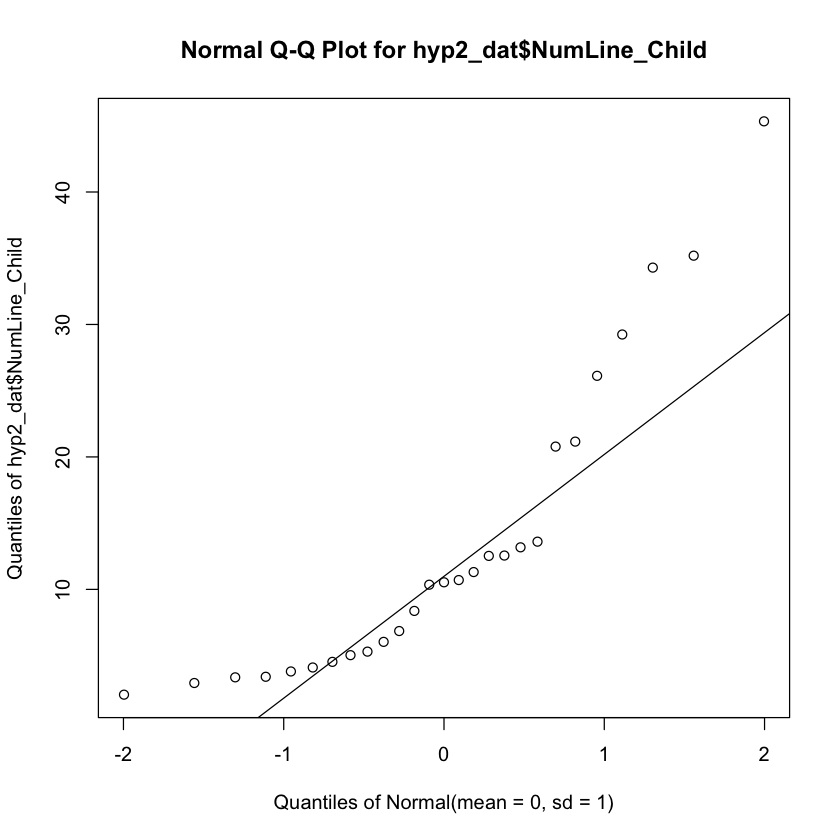

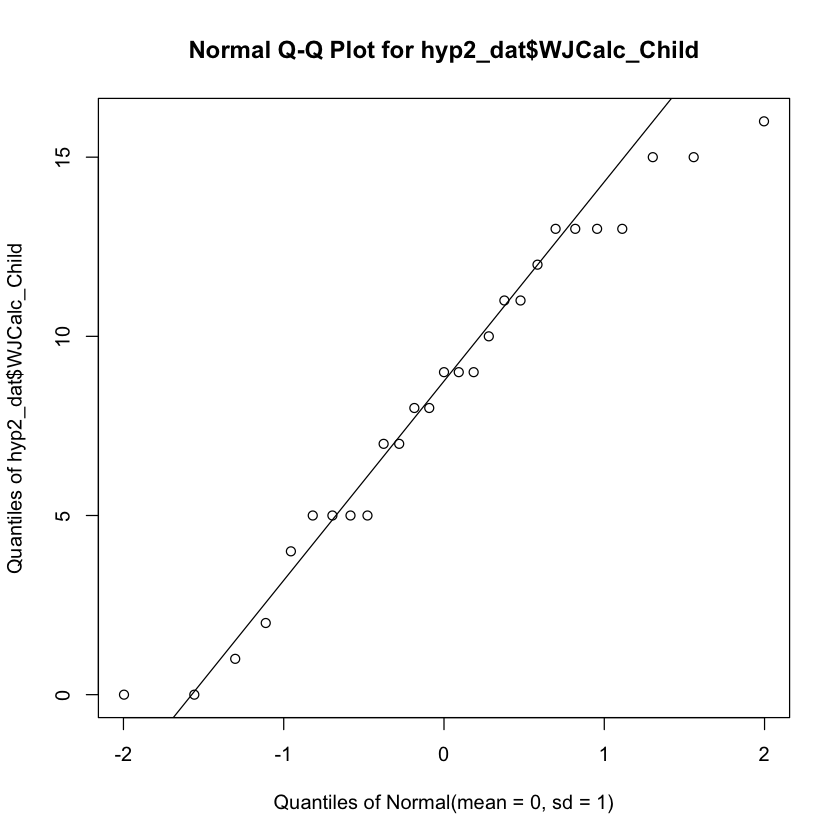

In [12]:
#install.packages("EnvStats")
library(EnvStats)

qqPlot(x=hyp2_dat$NumLine_Child); qqline(hyp2_dat$NumLine_Child)
    
qqPlot(x=hyp2_dat$WJCalc_Child); qqline(hyp2_dat$WJCalc_Child)

The first plot indicates that our NumLine_Child measure is not normally distributed because the data deviate from the straight line, while the second plot indicates that our WJCalc_Child measure is normally distributed, because the data lie along the straight line. For the purposes of this project, I will still operate under the assummption of normality for my number line linear model. I will also conduct bootstrapped accuracy tests of the model estimates to mediate this issue.

2. Perform best subset selection for number line model

In [31]:
install.packages("leaps")
library(leaps)

#Number line
numline_regfit.full = regsubsets(x = NumLine_Child ~ HLE_Child + STAC_Child + Sex_Child + CAI_Child + CorsiBlock_Child + KBIT2.VerbalKnowl_Child + KBIT2.Matrices_Child + Age.Years_Child, data = hyp1_dat)
numline_reg.summary <- summary(numline_regfit.full)
print(numline_reg.summary)


The downloaded binary packages are in
	/var/folders/g5/1rbd_9ns2sb7ccgj9td4k8gm0000gn/T//RtmpSQIJqa/downloaded_packages
Subset selection object
Call: regsubsets.formula(x = NumLine_Child ~ HLE_Child + STAC_Child + 
    Sex_Child + CAI_Child + CorsiBlock_Child + KBIT2.VerbalKnowl_Child + 
    KBIT2.Matrices_Child + Age.Years_Child, data = hyp1_dat)
8 Variables  (and intercept)
                        Forced in Forced out
HLE_Child                   FALSE      FALSE
STAC_Child                  FALSE      FALSE
Sex_Child                   FALSE      FALSE
CAI_Child                   FALSE      FALSE
CorsiBlock_Child            FALSE      FALSE
KBIT2.VerbalKnowl_Child     FALSE      FALSE
KBIT2.Matrices_Child        FALSE      FALSE
Age.Years_Child             FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         HLE_Child STAC_Child Sex_Child CAI_Child CorsiBlock_Child
1  ( 1 ) " "       " "        " "       " "       " "             
2  ( 1 ) " "      

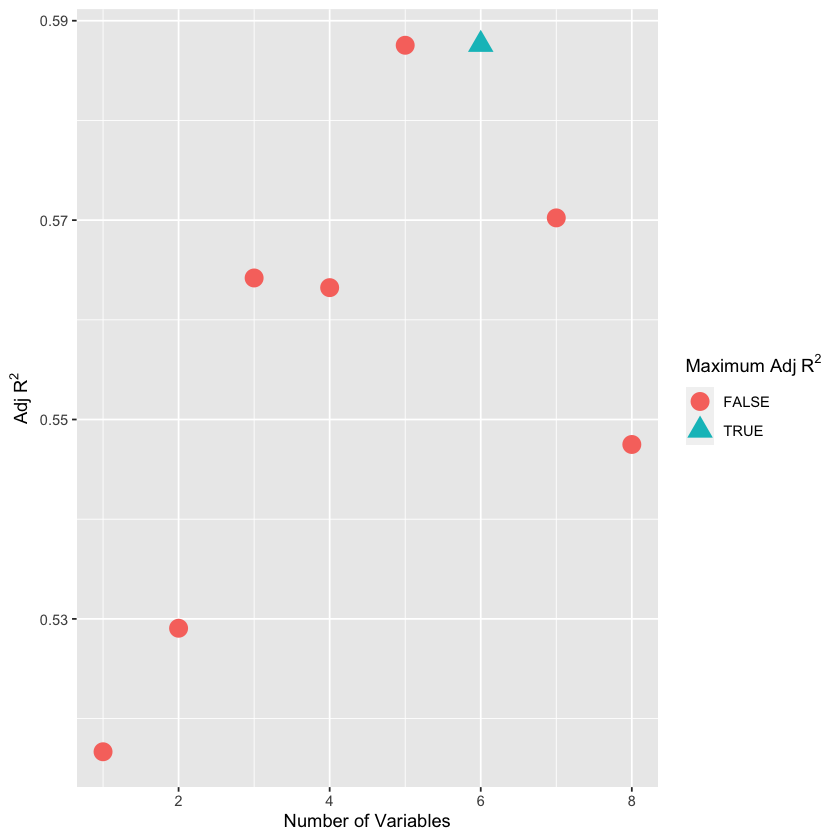

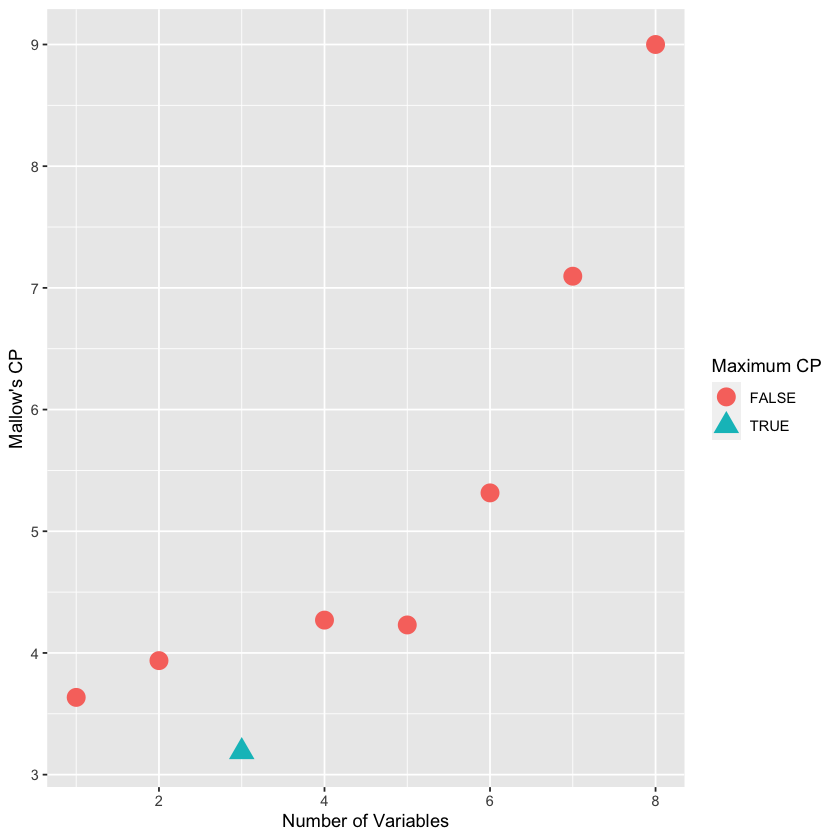

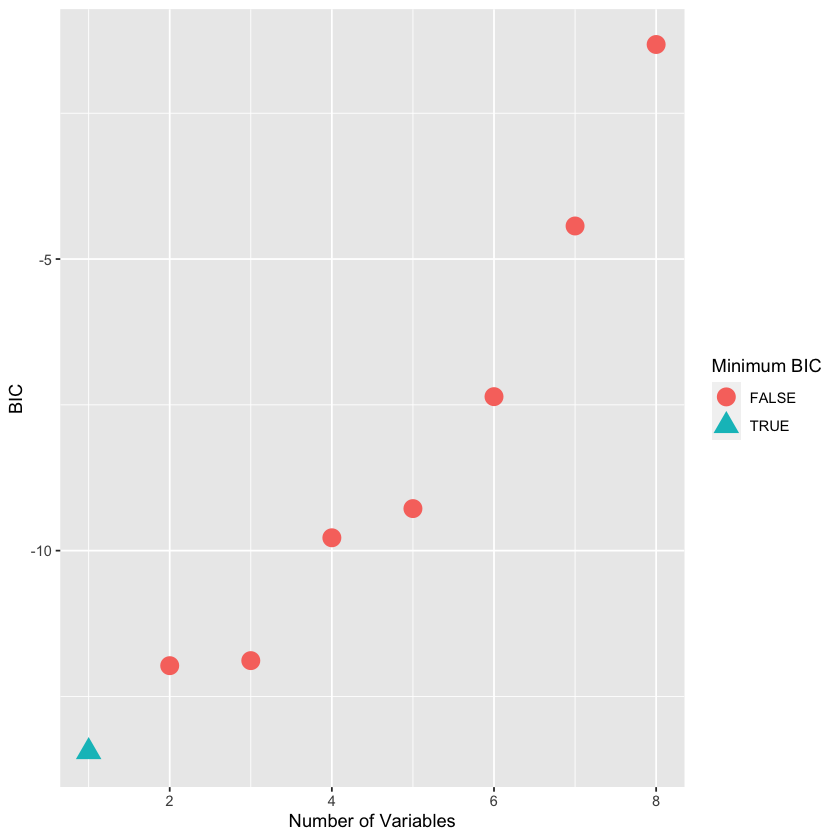

In [32]:
numvar = 1:length(numline_reg.summary$adjr2)
allfalse = rep(FALSE,length(numline_reg.summary$adjr2))

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- numline_reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(numline_reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=5) + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- numline_reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(numline_reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=5) + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- numline_reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(numline_reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=5) +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

3. Bootstrap model estimates

4. Perform best subset selection for calculation model

In [33]:
#Calculation
calc_regfit.full = regsubsets(x = WJCalc_Child ~ HLE_Child + STAC_Child + Sex_Child + CAI_Child + CorsiBlock_Child + KBIT2.VerbalKnowl_Child + KBIT2.Matrices_Child + Age.Years_Child, data = hyp1_dat)
calc_reg.summary <- summary(calc_regfit.full)
print(calc_reg.summary)

Subset selection object
Call: regsubsets.formula(x = WJCalc_Child ~ HLE_Child + STAC_Child + 
    Sex_Child + CAI_Child + CorsiBlock_Child + KBIT2.VerbalKnowl_Child + 
    KBIT2.Matrices_Child + Age.Years_Child, data = hyp1_dat)
8 Variables  (and intercept)
                        Forced in Forced out
HLE_Child                   FALSE      FALSE
STAC_Child                  FALSE      FALSE
Sex_Child                   FALSE      FALSE
CAI_Child                   FALSE      FALSE
CorsiBlock_Child            FALSE      FALSE
KBIT2.VerbalKnowl_Child     FALSE      FALSE
KBIT2.Matrices_Child        FALSE      FALSE
Age.Years_Child             FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         HLE_Child STAC_Child Sex_Child CAI_Child CorsiBlock_Child
1  ( 1 ) " "       " "        " "       " "       " "             
2  ( 1 ) " "       " "        " "       " "       "*"             
3  ( 1 ) " "       " "        " "       " "       "*"             
4  ( 1

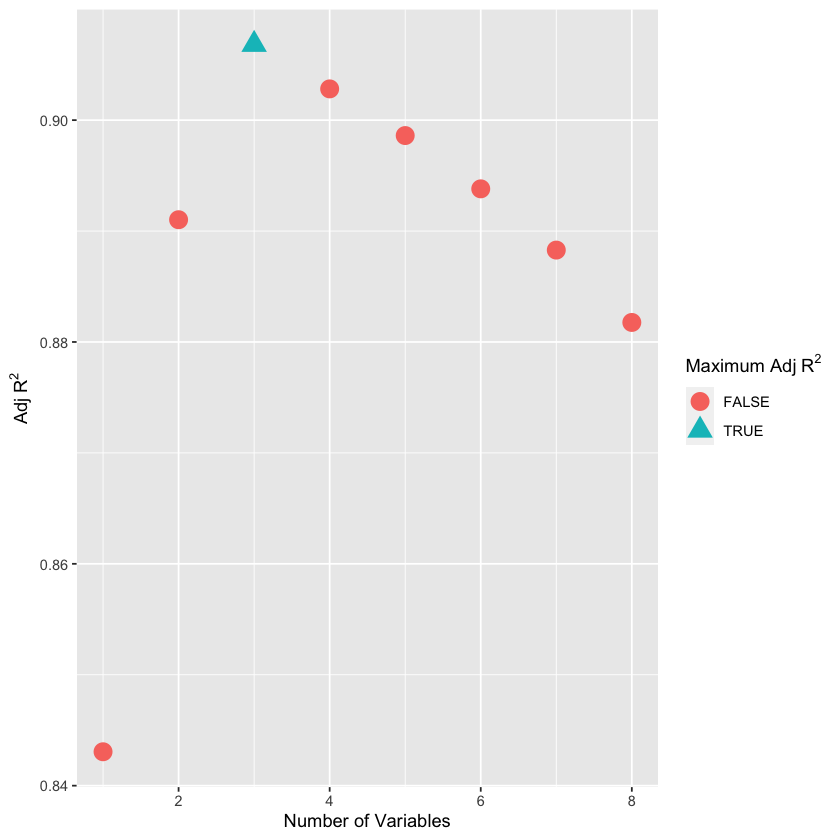

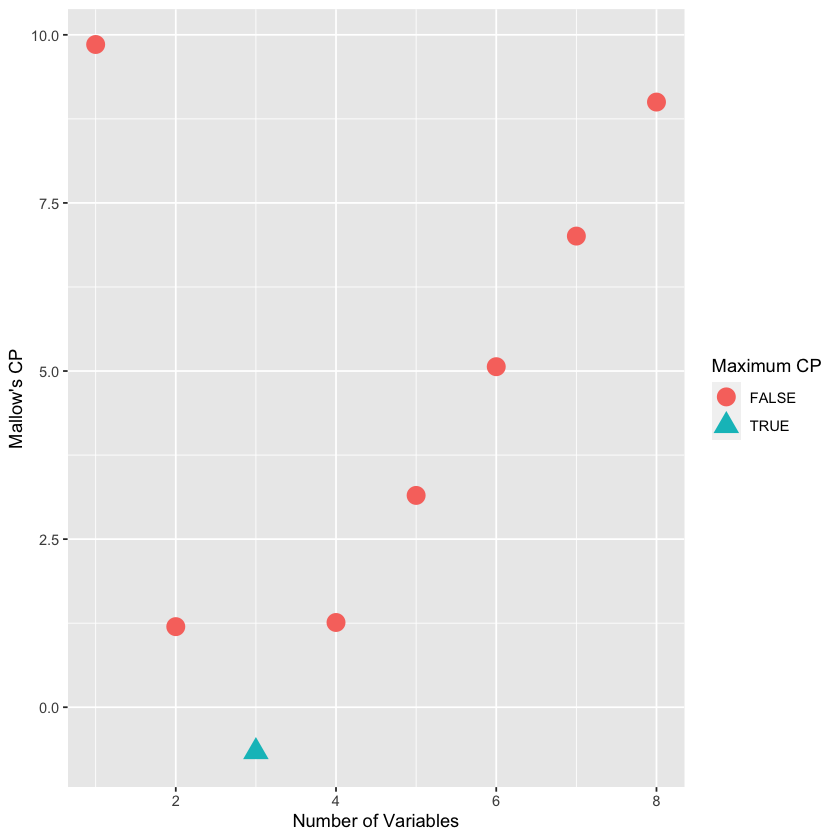

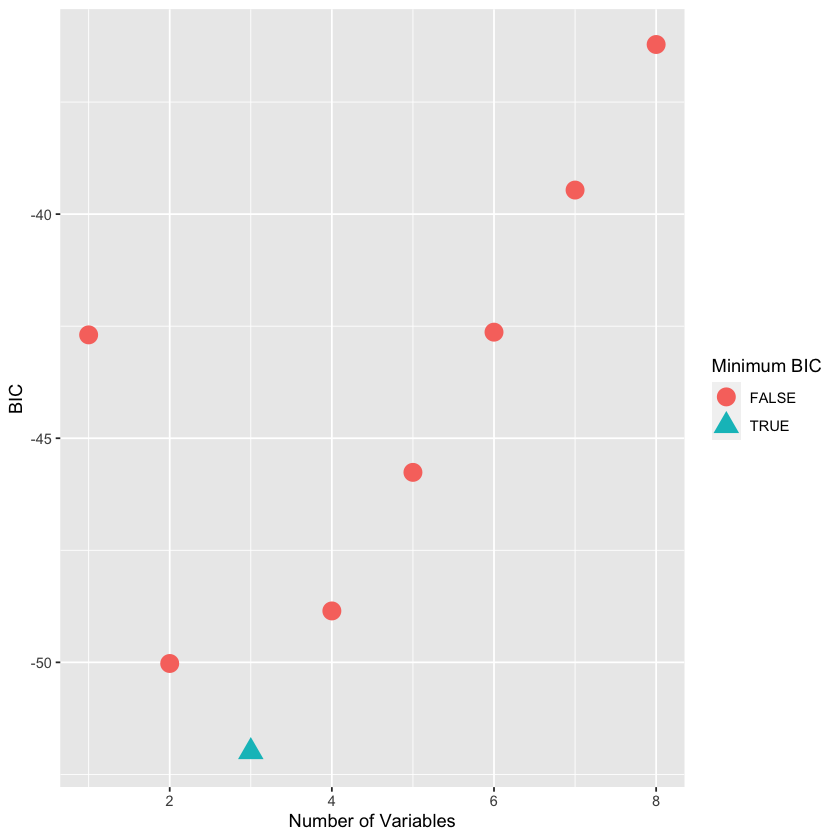

In [34]:
numvar = 1:length(calc_reg.summary$adjr2)
allfalse = rep(FALSE,length(calc_reg.summary$adjr2))

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- calc_reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(calc_reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=5) + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- calc_reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(calc_reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=5) + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- calc_reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(calc_reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=5) +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

### Hypothesis 2: Parents’ math and spatial performance is predictive of their children’s math and spatial performance and potentially mediated by the child’s spatial experience.



#### Steps:
    1. Run number line and calculation linear models
    2. Conduct 4-fold cross validation
    3. Calculate bootstrapped accuracy of model estimates
    4. Run exploratory mediation analysis

1. Linear Models

In [16]:
library(boot)

numline_lm <- glm(NumLine_Child ~ NumLine_Parent + Age.Years_Child, data = hyp2_dat)
summary(numline_lm)

calc_lm <- glm(WJCalc_Child ~ WJCalc_Parent + Age.Years_Child, data = hyp2_dat)
summary(calc_lm)


Call:
glm(formula = NumLine_Child ~ NumLine_Parent + Age.Years_Child, 
    data = hyp2_dat)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-12.8337   -3.5378   -0.3732    3.6880   18.4720  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       62.685      8.557   7.326 1.45e-07 ***
NumLine_Parent    -1.145      1.230  -0.931    0.361    
Age.Years_Child   -6.777      1.226  -5.526 1.10e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 59.19978)

    Null deviance: 3443.5  on 26  degrees of freedom
Residual deviance: 1420.8  on 24  degrees of freedom
AIC: 191.63

Number of Fisher Scoring iterations: 2



Call:
glm(formula = WJCalc_Child ~ WJCalc_Parent + Age.Years_Child, 
    data = hyp2_dat)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.865  -1.568   0.646   1.145   2.651  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -17.86607    2.80967  -6.359 1.42e-06 ***
WJCalc_Parent     0.08075    0.05872   1.375    0.182    
Age.Years_Child   3.45821    0.29068  11.897 1.49e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 3.412868)

    Null deviance: 566.296  on 26  degrees of freedom
Residual deviance:  81.909  on 24  degrees of freedom
AIC: 114.59

Number of Fisher Scoring iterations: 2


The models reveal that parents' number line estimation scores to not predict childrens' number line estimation scores, nor do parents' calculation skills predict their childrens' calculation scores. As to be expected, child age is a significant predictor of thier number line and calculation scores.

2. 4-fold Cross Validation

In [17]:
numline_cv.err <- cv.glm(hyp2_dat, numline_lm, K=4)
numline_cv.err$delta 

[1] 75.06604 71.67005

In [18]:
calc_cv.err <- cv.glm(hyp2_dat, calc_lm, K=4)
calc_cv.err$delta

[1] 4.671884 4.423569

interpret prediction errors

3. Bootstrapping

    (Intercept)  NumLine_Parent Age.Years_Child 
      62.684528       -1.144588       -6.776742 
    (Intercept)   WJCalc_Parent Age.Years_Child 
   -17.86607040      0.08075183      3.45820845 

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = hyp2_dat, statistic = numline_boot, R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* 62.684528  0.40999763   11.473978
t2* -1.144588 -0.10390269    1.113872
t3* -6.776742 -0.04796338    1.352525


$names
 [1] "t0"        "t"         "R"         "data"      "seed"      "statistic"
 [7] "sim"       "call"      "stype"     "strata"    "weights"  

$class
[1] "boot"

$boot_type
[1] "boot"


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = hyp2_dat, statistic = calc_boot, R = 1000)


Bootstrap Statistics :
        original       bias    std. error
t1* -17.86607040 -0.216119110  3.25581506
t2*   0.08075183  0.006074683  0.06528766
t3*   3.45820845  0.009251040  0.32012934


$names
 [1] "t0"        "t"         "R"         "data"      "seed"      "statistic"
 [7] "sim"       "call"      "stype"     "strata"    "weights"  

$class
[1] "boot"

$boot_type
[1] "boot"

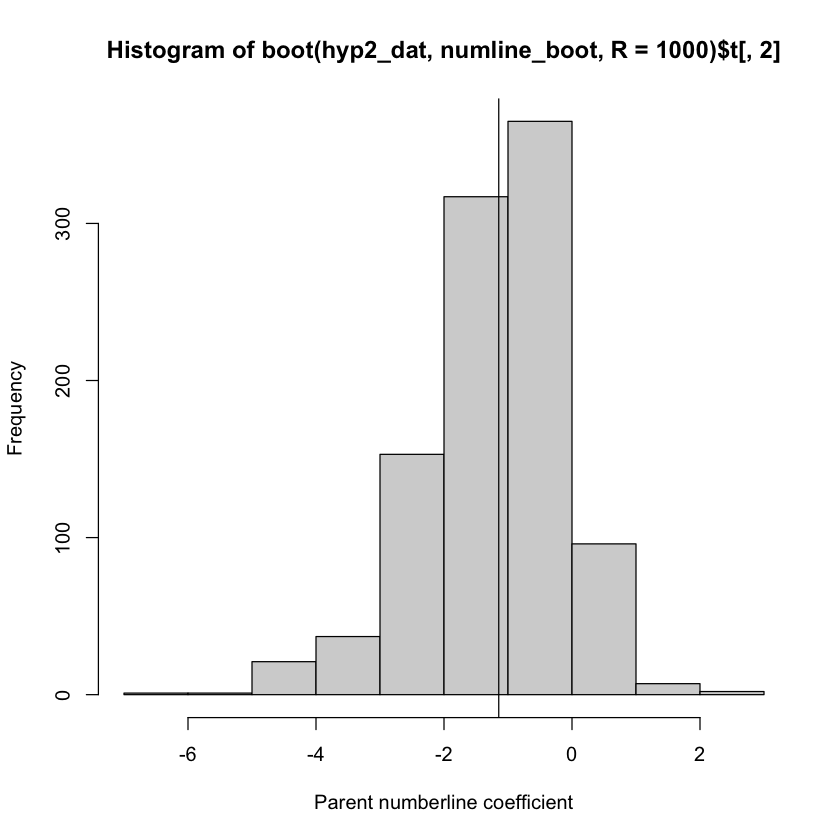

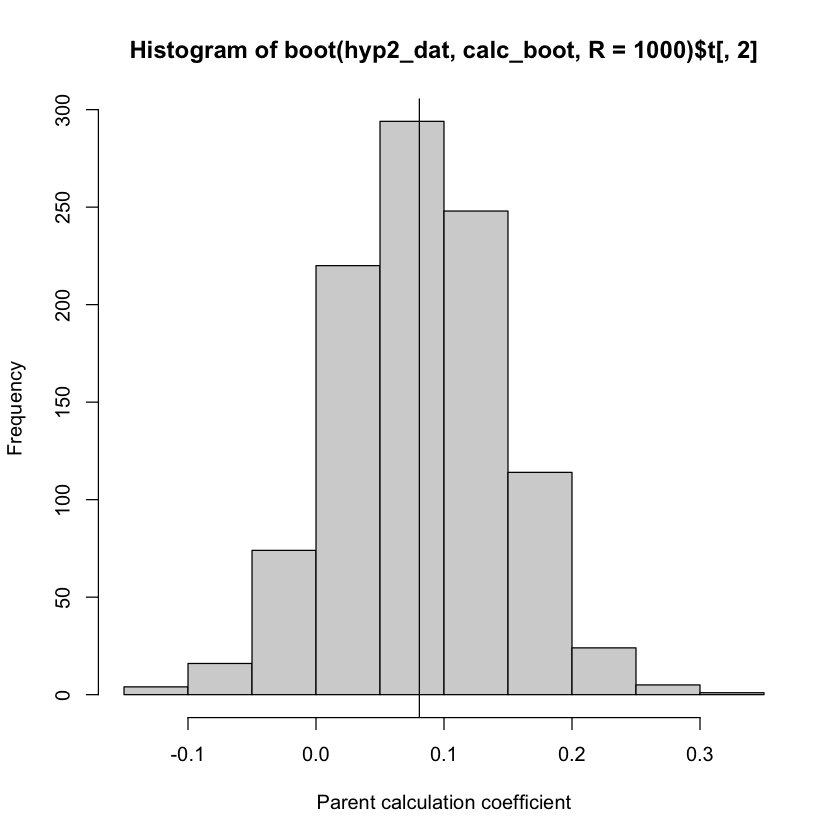

In [30]:
library(tidyverse)

numline_boot <- function(data, index){  
    return(coef(lm(NumLine_Child ~ NumLine_Parent + Age.Years_Child, data=data, subset=index)))}

calc_boot <- function(data, index){  
    return(coef(lm(WJCalc_Child ~ WJCalc_Parent + Age.Years_Child, data=data, subset=index)))}

#sanity check
print(numline_boot(hyp2_dat, 1:34))
print(calc_boot(hyp2_dat, 1:34))

#bootstrap for number line model
numline_boot_obj = boot(hyp2_dat, numline_boot, R=1000)
print(numline_boot_obj)
attributes(numline_boot_obj)

hist(boot(hyp2_dat, numline_boot, R=1000)$t[,2], xlab="Parent numberline coefficient")
abline(v=numline_lm$coefficients[2])

#bootstrap for calculation model
calc_boot_obj = boot(hyp2_dat, calc_boot, R=1000)
print(calc_boot_obj)
attributes(calc_boot_obj)

hist(boot(hyp2_dat, calc_boot, R=1000)$t[,2], xlab="Parent calculation coefficient")
abline(v=calc_lm$coefficients[2])

The coefficient estimates for both parent number line estimation and parent calculation lie in the bootstrapped distribution, 

4. Exploratory Mediation Analysis

Plot relationships between (1) child spatial experience, child numberline score, and parent numberline score; and (2) child spatial experience, child calculation score, and parent calculation score

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


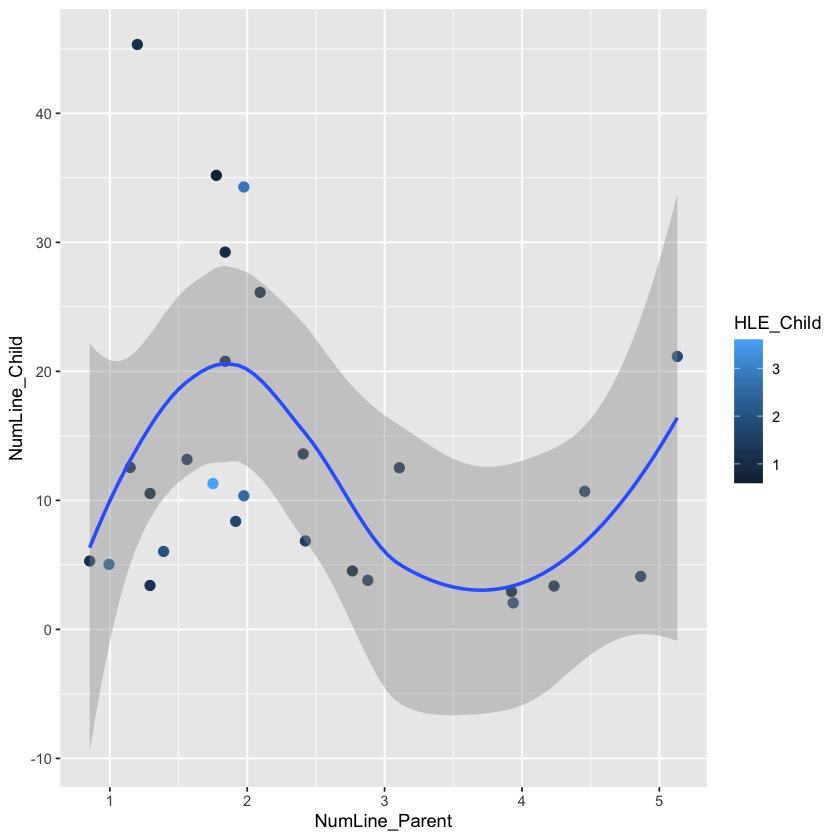

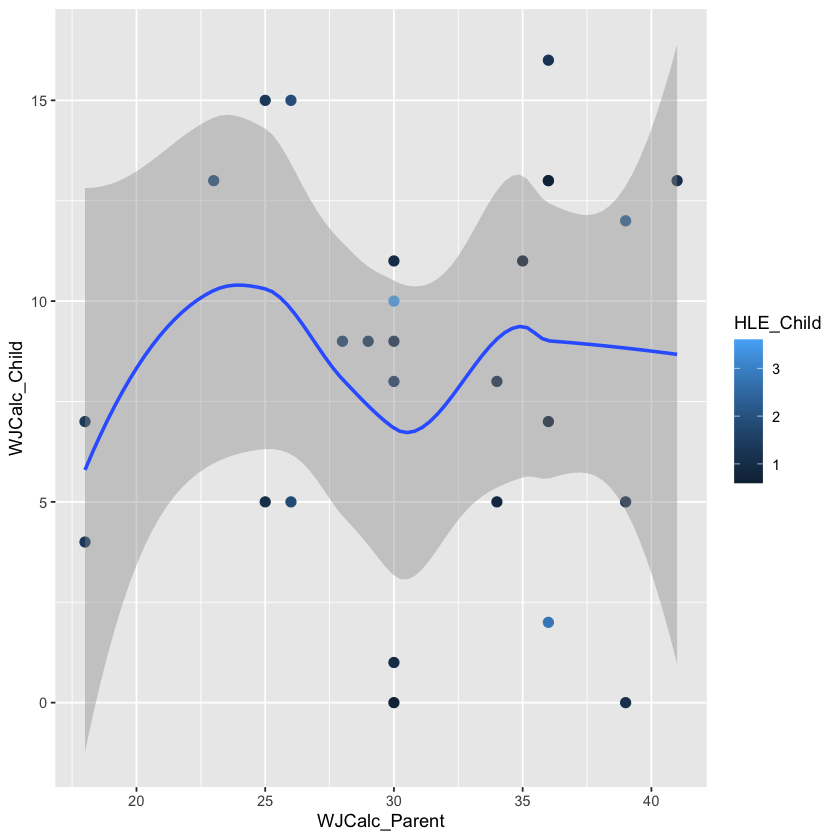

In [12]:
#NumLine plot
ggplot(hyp2_dat, aes(x=NumLine_Parent, y=NumLine_Child, color = HLE_Child)) +
  geom_point(size = 2.5) +
  geom_smooth()

#Calc plot
ggplot(hyp2_dat, aes(x=WJCalc_Parent, y=WJCalc_Child, color = HLE_Child)) +
  geom_point(size = 2.5) +
  geom_smooth()

Mediation Analyses

In [14]:
library(mediation)

#NumLine analysis
fitM <- lm(HLE_Child ~ NumLine_Parent, data=hyp2_dat) #Step 1: IV on M, parent numberline score predicting child spatial experience
fitY <- lm(NumLine_Child ~ NumLine_Parent + HLE_Child, data=hyp2_dat) #Step 2: IV and M on DV, parent numberline and child spatial experience predicting child numberline score
summary(fitM)
summary(fitY)
fitMed <- mediate(fitM, fitY, treat="NumLine_Parent", mediator="HLE_Child")
summary(fitMed)

#Calc analysis
fitM <- lm(HLE_Child ~ WJCalc_Parent, data=hyp2_dat) #Step 1: IV on M, parent calculation predicting child spatial experience
fitY <- lm(WJCalc_Child ~ WJCalc_Parent + HLE_Child, data=hyp2_dat) #Step 2: IV and M on DV, parent calculation score and child spatial experience predicting child calculation score
summary(fitM)
summary(fitY)
fitMed <- mediate(fitM, fitY, treat="WJCalc_Parent", mediator="HLE_Child")
summary(fitMed)


Call:
lm(formula = HLE_Child ~ NumLine_Parent, data = hyp2_dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8449 -0.4627 -0.2312  0.3522  2.1143 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.55599    0.30992   5.021 3.53e-05 ***
NumLine_Parent -0.04017    0.11475  -0.350    0.729    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7288 on 25 degrees of freedom
Multiple R-squared:  0.004877,	Adjusted R-squared:  -0.03493 
F-statistic: 0.1225 on 1 and 25 DF,  p-value: 0.7293



Call:
lm(formula = NumLine_Child ~ NumLine_Parent + HLE_Child, data = hyp2_dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.960  -7.584  -3.693   3.865  28.675 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)      20.813      6.970   2.986  0.00641 **
NumLine_Parent   -2.355      1.825  -1.290  0.20939   
HLE_Child        -1.172      3.174  -0.369  0.71511   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.57 on 24 degrees of freedom
Multiple R-squared:  0.06768,	Adjusted R-squared:  -0.01002 
F-statistic: 0.8711 on 2 and 24 DF,  p-value: 0.4313



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

                Estimate 95% CI Lower 95% CI Upper p-value
ACME            0.053144    -0.784666         1.02    0.96
ADE            -2.404693    -5.865822         1.08    0.21
Total Effect   -2.351549    -5.980350         1.16    0.24
Prop. Mediated  0.000703    -1.054309         1.28    0.98

Sample Size Used: 27 


Simulations: 1000 



Call:
lm(formula = HLE_Child ~ WJCalc_Parent, data = hyp2_dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8311 -0.4515 -0.2240  0.2782  2.1330 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)    1.681829   0.732356   2.296   0.0303 *
WJCalc_Parent -0.007163   0.023131  -0.310   0.7594  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7292 on 25 degrees of freedom
Multiple R-squared:  0.003821,	Adjusted R-squared:  -0.03603 
F-statistic: 0.09588 on 1 and 25 DF,  p-value: 0.7594



Call:
lm(formula = WJCalc_Child ~ WJCalc_Parent + HLE_Child, data = hyp2_dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3410 -3.0313 -0.1162  3.3458  7.7150 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)    5.24622    5.27297   0.995    0.330
WJCalc_Parent  0.04496    0.15164   0.297    0.769
HLE_Child      1.18351    1.30858   0.904    0.375

Residual standard error: 4.771 on 24 degrees of freedom
Multiple R-squared:  0.03522,	Adjusted R-squared:  -0.04518 
F-statistic: 0.438 on 2 and 24 DF,  p-value: 0.6504



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value
ACME           -0.00977     -0.11674         0.08    0.84
ADE             0.03743     -0.25589         0.31    0.79
Total Effect    0.02766     -0.27153         0.33    0.84
Prop. Mediated  0.01859     -2.09134         4.14    0.86

Sample Size Used: 27 


Simulations: 1000 


interpret mediation analysis

## Conclusions